In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\home\\WorkSpace\\바이트디그리_머신러닝'

In [3]:
# 데이터 불러오기
df = pd.read_csv(r'C:\Users\home\WorkSpace\바이트디그리_머신러닝\ToyotaCorolla.csv')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df.shape

(1436, 37)

In [5]:
# 데이터 수와 변수의 수 확인하기
nCar = df.shape[0]
nVar = df.shape[1]
print(nCar,nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [6]:
## 가변수 생성
df.Fuel_Type.unique()
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [8]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx =np.array(df.Fuel_Type == 'Petrol')
d_idx =np.array(df.Fuel_Type == 'Diesel')
c_idx =np.array(df.Fuel_Type == 'CNG')

In [10]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [11]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [13]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가


In [14]:
Fuel = pd.DataFrame({'Petrol' : dummy_p, 'Diesel' : dummy_d, 'CNG' : dummy_c})

In [15]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [16]:
df_ = df.drop(['Id', 'Model', 'Fuel_Type'],axis = 1, inplace = False)
mlr_data = pd.concat((df_,Fuel),1)

In [17]:
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [21]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [22]:
feature_columns = mlr_data.columns.difference(['Price'])
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [23]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [24]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     296.4
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:20:51   Log-Likelihood:                -8438.8
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     971   BIC:                         1.711e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -387.0372    135.392     -2.859      0.004    -652.731    -121.343
Age_08_04         -118.8176      4.071    -29.188      0.000    -126.806    -110.829
Airbag_1           229.5776    270.118      0.850      0.396    -300.505     759.661
Airbag_2           -71.0012    132.888     -0.534      0.593    -331.782     189.779
Airco              254.0983     96.244      2.640      0.008      65.229     442.968
Automatic          598.2810    156.726      3.817      0.000     290.721     905.841
Automatic_airco   2275.7349    193.396     11.767      0.000    1896.213    2655.257
BOVAG_Guarantee    488.6892    129.333      3.779      0.000     234.884     742.494
Backseat_Divider  -211.8523    137.929     -1.536      0.125    -482.526      58.822
Boardcomputer     -204.0048    123.022     -1.658      0.098    -445.425      37.415
CD_Player          241.3672    102.752      2.349      0.019      39.725     443.009
CNG               -977.8187    267.560     -3.655      0.000   -1502.882    -452.756
Central_Lock      -133.7514    150.255     -0.890      0.374    -428.613     161.110
Cylinders           -0.0321      0.002    -13.822      0.000      -0.037      -0.028
Diesel             322.2872    192.302      1.676      0.094     -55.089     699.663
Doors               65.8090     41.683      1.579      0.115     -15.991     147.608
Gears               43.8279    225.937      0.194      0.846    -399.553     487.208
Guarantee_Period    62.1227     13.310      4.667      0.000      36.003      88.243
HP                  28.3372      3.519      8.053      0.000      21.432      35.242
KM                  -0.0170      0.001    -12.566      0.000      -0.020      -0.014
Met_Color           72.2676     80.666      0.896      0.371     -86.031     230.567
Metallic_Rim       339.7830     99.102      3.429      0.001     145.305     534.261
Mfg_Month         -103.7815     10.613     -9.778      0.000    -124.609     -82.954
Mfg_Year             2.4455      0.874      2.799      0.005       0.731       4.160
Mfr_Guarantee      186.6839     77.234      2.417      0.016      35.119     338.249
Mistlamps          -72.8305    113.480     -0.642      0.521    -295.524     149.863
Petrol             655.5234    217.961      3.008      0.003     227.795    1083.252
Power_Steering    -117.5759    295.608     -0.398      0.691    -697.680     462.529
Powered_Windows    411.3084    152.617      2.695      0.007     111.812     710.805
Quarterly_Tax       11.0252      1.989      5.542      0.000       7.121      14.929
Radio             2631.3770   1136.148      2.316      0.021     401.790    4860.964
Radio_cassette   -2675.5670   1133.548     -2.360      0.018   -4900.053    -451.081
Sport_Model        400.6914     90.579      4.424      0.000     222.937     578.446
Tow_Bar           -275.

## VIF를 통한 다중공선성 확인 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\home\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\home\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


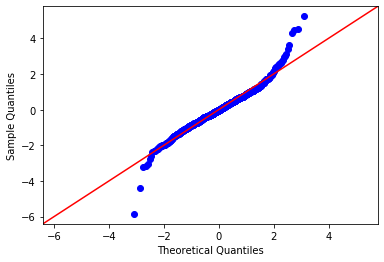

In [27]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

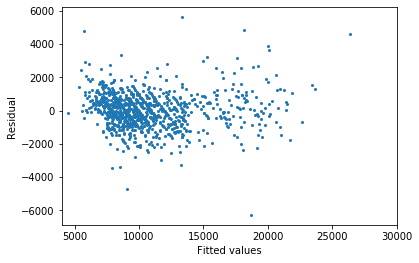

In [41]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [36]:
 ## 검증 데이터에 대한 예측 
pred_y2 = fitted_full_model.predict(test_x)

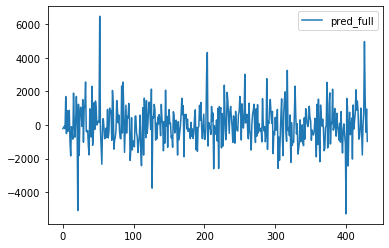

In [42]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2 ),label="pred_full")
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

In [34]:
## MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

1430698.910973206

# 변수선택법

In [43]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFA33B7248>, 'AIC': 19036.00624842942}


In [44]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1efa33b78c8>,
 'AIC': 16945.564408066035}

In [45]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.6766884326934814 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17503.2
Name: 211, dtype: object


In [46]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [47]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.040222883224487305 seconds.
Processed  630 models on 2 predictors in 0.609919548034668 seconds.
Processed  7140 models on 3 predictors in 7.434439182281494 seconds.
Total elapsed time: 8.210188388824463 seconds.


In [48]:
models

,AIC,model
1,17730.386375,<statsmodels.regression.linear_model.Regressio...
2,17503.166346,<statsmodels.regression.linear_model.Regressio...
3,17351.524077,<statsmodels.regression.linear_model.Regressio...


In [49]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1990.
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:46:47   Log-Likelihood:                -8671.8
No. Observations:                1005   AIC:                         1.735e+04
Df Residuals:                    1001   BIC:                         1.737e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0232      0.001    -16.574      0.000      -0.026      -0.020
Mfg_Year    1501.0273     37.623     39.897      0.000    1427.199    1574.856
Weight        17.0901      0.958     17.847      0.000      15.211      18.969
const      -3.008e+06   7.48e+04    -40.229      0.000   -3.15e+06   -2.86e+06
==============================================================================
Omnibus:                      152.478   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1629.563
Skew:                          -0.293   Prob(JB):                         0.00
Kurtosis:                       9.211   Cond. No.                     1.35e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.90969
full model AIC:  16945.56441
full model MSE:  12752068.86577
selected model Rsquared:  0.85642
selected model AIC:  17351.52408
selected model MSE:  12752068.86577


Text(0, 0.5, 'BIC')

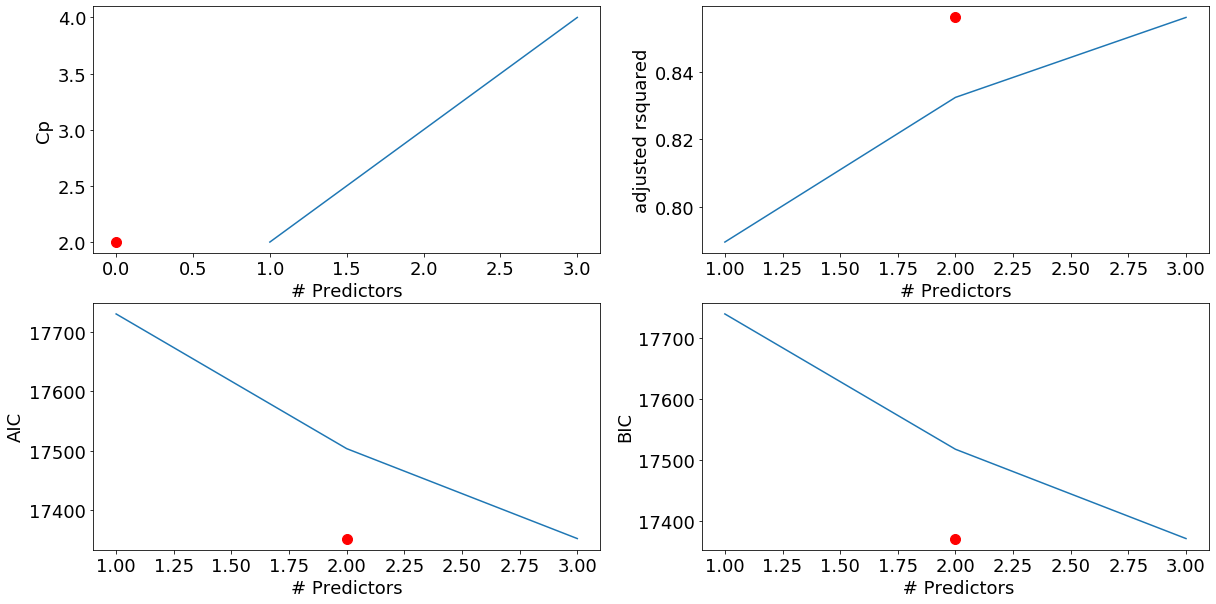

In [51]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [52]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [53]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [54]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.10216116905212402
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFBF5FDDC8>
Processed  35 models on 2 predictors in 0.036437273025512695
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFAD9EAC48>
Processed  34 models on 3 predictors in 0.03839445114135742
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFADA0C448>
Processed  33 models on 4 predictors in 0.03489327430725098
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EF9D8B7088>
Processed  32 models on 5 predictors in 0.03658914566040039
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP

In [55]:
Forward_best_model.aic

16935.649213898

In [56]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     443.7
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:52:54   Log-Likelihood:                -8444.8
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     982   BIC:                         1.705e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year             3.1591      0.582      5.430      0.000       2.017       4.301
Automatic_airco   2244.1991    181.861     12.340      0.000    1887.317    2601.081
HP                  29.7280      2.888     10.295      0.000      24.061      35.395
Weight               7.3527      1.113      6.603      0.000       5.168       9.538
KM                  -0.0177      0.001    -13.833      0.000      -0.020      -0.015
Powered_Windows    313.3600     87.765      3.570      0.000     141.131     485.589
Quarterly_Tax        9.2336      1.406      6.567      0.000       6.475      11.993
Sport_Model        427.1057     85.989      4.967      0.000     258.363     595.849
Guarantee_Period    60.7372     13.151      4.619      0.000      34.931      86.544
BOVAG_Guarantee    485.4626    127.679      3.802      0.000     234.907     736.018
ABS               -429.1951    105.685     -4.061      0.000    -636.590    -221.800
Metallic_Rim       331.1317     93.718      3.533      0.000     147.222     515.042
Automatic          604.6262    152.935      3.953      0.000     304.510     904.743
CNG              -1359.6413    396.324     -3.431      0.001   -2137.380    -581.902
Tow_Bar           -248.7993     81.741     -3.044      0.002    -409.206     -88.393
Airco              226.9086     91.580      2.478      0.013      47.193     406.624
Mfr_Guarantee      188.7064     76.057      2.481      0.013      39.454     337.958
CD_Player          263.7951     98.789      2.670      0.008      69.933     457.657
Boardcomputer     -200.2419    120.478     -1.662      0.097    -436.666      36.182
Doors               72.0573     39.645      1.818      0.069      -5.741     149.856
Backseat_Divider  -185.0610    119.707     -1.546      0.122    -419.973      49.851
Mfg_Month         -102.9936     10.491     -9.817      0.000    -123.581     -82.406
Age_08_04         -118.4114      3.916    -30.237      0.000    -126.096    -110.726
Cylinders           -0.0305      0.002    -15.520      0.000      -0.034      -0.027
const               -0.0076      0.000    -15.520      0.000      -0.009      -0.007
==============================================================================
Omnibus:                       82.086   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.965
Skew:                           0.202   Prob(JB):                     1.39e-82
Kurtosis:                       5.973   Cond. No.                     4.85e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.56e-33. This might indicate that there are
strong multicollinearity problems or that the desi

# 후진소거법

In [57]:
######## 후진소거법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [58]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [59]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.16336774826049805
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFA1E37B88>
Processed  35 models on 34 predictors in 0.1619396209716797
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 

In [60]:
Backward_best_model.aic

16933.105071037047

In [62]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     408.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:55:50   Log-Likelihood:                -8441.6
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     980   BIC:                         1.706e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -451.2254    105.892     -4.261      0.000    -659.027    -243.424
Airco              223.9406     91.395      2.450      0.014      44.589     403.292
Automatic          603.3676    152.603      3.954      0.000     303.901     902.834
Automatic_airco   2236.7434    181.710     12.309      0.000    1880.157    2593.330
BOVAG_Guarantee    501.0221    128.075      3.912      0.000     249.690     752.354
Backseat_Divider  -196.1488    119.888     -1.636      0.102    -431.416      39.118
Boardcomputer     -214.0827    121.693     -1.759      0.079    -452.892      24.727
CD_Player          256.6717     99.904      2.569      0.010      60.620     452.723
CNG              -1379.8916    395.520     -3.489      0.001   -2156.054    -603.729
Cylinders        -6.746e+05   2.25e+04    -29.923      0.000   -7.19e+05    -6.3e+05
Doors               74.9538     39.701      1.888      0.059      -2.954     152.862
Guarantee_Period    62.5318     13.180      4.745      0.000      36.668      88.395
HP                  30.0386      2.888     10.402      0.000      24.372      35.705
KM                  -0.0176      0.001    -13.757      0.000      -0.020      -0.015
Metallic_Rim       329.8180     93.542      3.526      0.000     146.253     513.383
Mfg_Month           14.9000     10.549      1.412      0.158      -5.802      35.602
Mfg_Year          1433.3350     48.058     29.825      0.000    1339.026    1527.644
Mfr_Guarantee      197.3425     75.964      2.598      0.010      48.272     346.413
Powered_Windows    306.7217     87.618      3.501      0.000     134.780     478.663
Quarterly_Tax        9.3450      1.404      6.658      0.000       6.591      12.099
Radio             2778.2589   1105.736      2.513      0.012     608.377    4948.141
Radio_cassette   -2796.8120   1105.603     -2.530      0.012   -4966.434    -627.190
Sport_Model        428.3413     86.036      4.979      0.000     259.505     597.177
Tow_Bar           -251.8686     82.172     -3.065      0.002    -413.123     -90.615
Weight               7.2563      1.112      6.524      0.000       5.074       9.439
const            -1.686e+05   5636.080    -29.923      0.000    -1.8e+05   -1.58e+05
==============================================================================
Omnibus:                       83.277   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.850
Skew:                           0.209   Prob(JB):                     2.70e-84
Kurtosis:                       6.003   Cond. No.                     1.31e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.52e-20. 

# 단계적 선택법

In [63]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [64]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.03690028190612793
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFA1E34248>
forward
Processed  1 models on 0 predictors in 0.0019948482513427734
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFA1D0EE48>
Processed  35 models on 2 predictors in 0.03387713432312012
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFA1E346C8>
forward
Processed  2 models on 1 predictors in 0.002991914749145508
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFA1DF06C8>
Processed  34 models on 3 predictors in 0.03789854049682617
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.R

Processed  21 models on 16 predictors in 0.04486870765686035
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Guarantee_Period', 'BOVAG_Guarantee', 'ABS', 'Metallic_Rim', 'Automatic', 'CNG', 'Tow_Bar', 'Airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFA1DE8588>
forward
Processed  16 models on 15 predictors in 0.03242802619934082
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Guarantee_Period', 'BOVAG_Guarantee', 'ABS', 'Metallic_Rim', 'Automatic', 'CNG', 'Tow_Bar', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFA1D95848>
Processed  20 models on 17 predictors in 0.04388260841369629
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Guarantee_Period', 'B

Processed  25 models on 24 predictors in 0.08078479766845703
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Guarantee_Period', 'BOVAG_Guarantee', 'ABS', 'Metallic_Rim', 'Automatic', 'CNG', 'Tow_Bar', 'Airco', 'Mfr_Guarantee', 'CD_Player', 'Boardcomputer', 'Doors', 'Backseat_Divider', 'Mfg_Month', 'Age_08_04', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFA1DDE7C8>
backward
Processed  12 models on 25 predictors in 0.04587697982788086
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Guarantee_Period', 'BOVAG_Guarantee', 'ABS', 'Metallic_Rim', 'Automatic', 'CNG', 'Tow_Bar', 'Airco', 'Mfr_Guarantee', 'CD_Player', 'Boardcomputer', 'Doors', 'Backseat_Divider', 'Mfg_Month', 'Age_08_04', 'Cylinders', 'Airbag_1', 'const']  AIC: <statsmodels.regression.linear_model.RegressionRe

Processed  25 models on 24 predictors in 0.07280540466308594
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Guarantee_Period', 'BOVAG_Guarantee', 'ABS', 'Metallic_Rim', 'Automatic', 'CNG', 'Tow_Bar', 'Airco', 'Mfr_Guarantee', 'CD_Player', 'Boardcomputer', 'Doors', 'Backseat_Divider', 'Mfg_Month', 'Age_08_04', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EFA1E0E548>
backward
Processed  12 models on 25 predictors in 0.040891170501708984
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Guarantee_Period', 'BOVAG_Guarantee', 'ABS', 'Metallic_Rim', 'Automatic', 'CNG', 'Tow_Bar', 'Airco', 'Mfr_Guarantee', 'CD_Player', 'Boardcomputer', 'Doors', 'Backseat_Divider', 'Mfg_Month', 'Age_08_04', 'Cylinders', 'Airbag_1', 'const']  AIC: <statsmodels.regression.linear_model.RegressionR

In [65]:
Stepwise_best_model.aic

16935.649213898

In [67]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     443.7
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:56:31   Log-Likelihood:                -8444.8
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     982   BIC:                         1.705e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year             3.1591      0.582      5.430      0.000       2.017       4.301
Automatic_airco   2244.1991    181.861     12.340      0.000    1887.317    2601.081
HP                  29.7280      2.888     10.295      0.000      24.061      35.395
Weight               7.3527      1.113      6.603      0.000       5.168       9.538
KM                  -0.0177      0.001    -13.833      0.000      -0.020      -0.015
Powered_Windows    313.3600     87.765      3.570      0.000     141.131     485.589
Quarterly_Tax        9.2336      1.406      6.567      0.000       6.475      11.993
Sport_Model        427.1057     85.989      4.967      0.000     258.363     595.849
Guarantee_Period    60.7372     13.151      4.619      0.000      34.931      86.544
BOVAG_Guarantee    485.4626    127.679      3.802      0.000     234.907     736.018
ABS               -429.1951    105.685     -4.061      0.000    -636.590    -221.800
Metallic_Rim       331.1317     93.718      3.533      0.000     147.222     515.042
Automatic          604.6262    152.935      3.953      0.000     304.510     904.743
CNG              -1359.6413    396.324     -3.431      0.001   -2137.380    -581.902
Tow_Bar           -248.7993     81.741     -3.044      0.002    -409.206     -88.393
Airco              226.9086     91.580      2.478      0.013      47.193     406.624
Mfr_Guarantee      188.7064     76.057      2.481      0.013      39.454     337.958
CD_Player          263.7951     98.789      2.670      0.008      69.933     457.657
Boardcomputer     -200.2419    120.478     -1.662      0.097    -436.666      36.182
Doors               72.0573     39.645      1.818      0.069      -5.741     149.856
Backseat_Divider  -185.0610    119.707     -1.546      0.122    -419.973      49.851
Mfg_Month         -102.9936     10.491     -9.817      0.000    -123.581     -82.406
Age_08_04         -118.4114      3.916    -30.237      0.000    -126.096    -110.726
Cylinders           -0.0305      0.002    -15.520      0.000      -0.034      -0.027
const               -0.0076      0.000    -15.520      0.000      -0.009      -0.007
==============================================================================
Omnibus:                       82.086   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.965
Skew:                           0.202   Prob(JB):                     1.39e-82
Kurtosis:                       5.973   Cond. No.                     4.85e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.56e-33. This might indicate that there are
strong multicollinearity problems or that the desi

# 성능평가 

In [68]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(25,) (26,) (25,)


In [69]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [70]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [71]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [72]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

             ALL      FORWARD    BACKWARD     STEPWISE
MSE   1.4307e+06  1.40902e+06  1.4583e+06  1.40902e+06
RMSE     1196.12      1187.02      1207.6      1187.02
MAE      884.211      878.435     890.609      878.435
MAPE      8.9093      8.84789      8.9555      8.84789


In [73]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
25
26
25
